# Apache Kafka

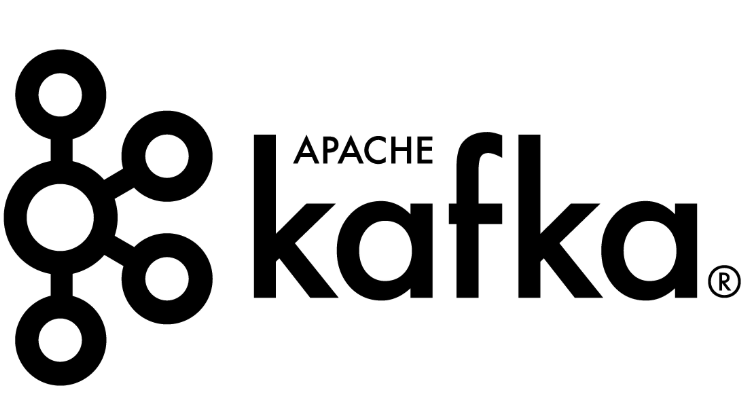

# Background

Apache Kafka is written in Scala and Java and is the creation of former LinkedIn data engineers. As early as 2011, the technology was handed over to the open-source community as a highly scalable messaging system. Today, Apache Kafka is part of the Confluent Stream Platform and handles trillions of events every day. ​Apache Kafka has established itself on the market with many trusted companies waving the Kafka banner.

Data and logs involved in today’s complex systems must be processed, reprocessed, analyzed and handled - often in real-time. And that's why Apache Kafka is playing a significant role in the message streaming landscape. The key design principles of Kafka were formed based on the growing need for high-throughput architectures that are easily scalable and provide the ability to store, process, and reprocess streaming data.

## What is Kafka

Kafka is a Publish/Subscribe messaging system. It allows producers to write records into Kafka that can be read by one or more consumers. These records that cannot be deleted or modify once they are sent to Kafka (this is known as “distributed commit log”).

Records are published into topics. Topics are like channels where all the records are stored. Consumers subscribe to one or more topics to read its records.

Kafka has a retention period, so it will store your records for the time or size you specify and can be set by topic.
Consumers label themselves with a consumer group name. In a consumer group, one or more consumers work together to consume a topic. When a new record arrives to the topic, it will be sent just to one consumer instance in the consumer group.

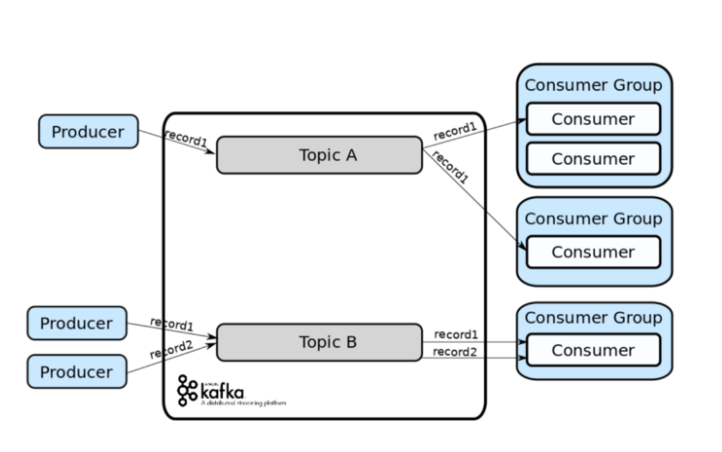

# Publish-subscribe durable messaging system

Apache Kafka is a publish-subscribe based durable messaging system. A messaging system sends messages between processes, applications, and servers.

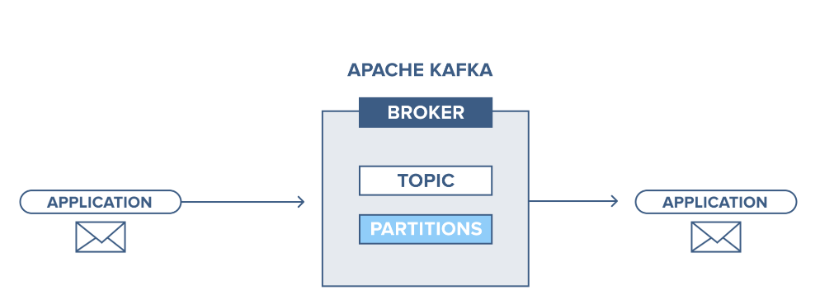

Apache Kafka is a software where topics can be defined (think of a topic as a category), applications can add, process and reprocess records.

Applications connect to this system and transfer a record onto the topic. A record can include any kind of information; for example, information about an event that has happened on a website, or an event that is supposed to trigger an event. Another application may connect to the system and process or re-process records from a topic. The data sent is stored until a specified retention period has passed by.

Records are byte arrays that can store any object in any format. A record has four attributes, key and value are mandatory, and the other attributes, timestamp, and headers are optional. The value can be whatever needs to be sent, for example, JSON or plain text.

These are four main parts in a Kafka system:

Broker: Handles all requests from clients (produce, consume, and metadata) and keeps data replicated within the cluster. There can be one or more brokers in a cluster.

Zookeeper: Keeps the state of the cluster (brokers, topics, users).

Producer: Sends records to a broker.

Consumer: Consumes batches of records from the broker.

### Kafka Broker

A Kafka cluster consists of one or more servers (Kafka brokers) running Kafka. Producers are processes that push records into Kafka topics within the broker. A consumer pulls records off a Kafka topic.

Running a single Kafka broker is possible but it doesn’t give all the benefits that Kafka in a cluster can give, for example, data replication.



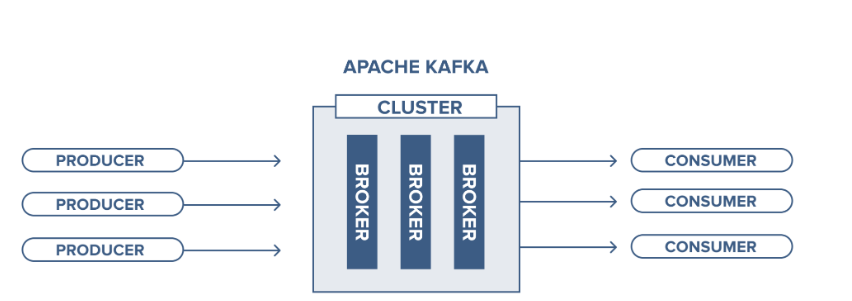

Management of the brokers in the cluster is performed by Zookeeper. There may be multiple Zookeepers in a cluster, in fact the recommendation is three to five, keeping an odd number so that there is always a majority and the number as low as possible to conserve overhead resources.

### Kafka Topic

A Topic is a category/feed name to which records are stored and published.

As said before, all Kafka records are organized into topics. Producer applications write data to topics and consumer applications read from topics. Records published to the cluster stay in the cluster until a configurable retention period has passed by.

Kafka retains records in the log, making the consumers responsible for tracking the position in the log, known as the “offset”. Typically, a consumer advances the offset in a linear manner as messages are read. However, the position is actually controlled by the consumer, which can consume messages in any order. For example, a consumer can reset to an older offset when reprocessing records.

#### Kafka topic partition

Kafka topics are divided into a number of partitions, which contain records in an unchangeable sequence. Each record in a partition is assigned and identified by its unique offset. A topic can also have multiple partition logs. This allows multiple consumers to read from a topic in parallel.

Partitions allow topics to be parallelized by splitting the data into a particular topic across multiple brokers.

In Kafka, replication is implemented at the partition level. The redundant unit of a topic partition is called a replica. Each partition usually has one or more replicas meaning that partitions contain messages that are replicated over a few Kafka brokers in the cluster.

Every partition (replica) has one server acting as a leader and the rest of them as followers. The leader replica handles all read-write requests for the specific partition and the followers replicate the leader. If the lead server fails, one of the follower servers becomes the leader by default. You should strive to have a good balance of leaders so each broker is a leader of an equal amount of partitions to distribute the load.

When a producer publishes a record to a topic, it is published to its leader. The leader appends the record to its commit log and increments its record offset. Kafka only exposes a record to a consumer after it has been committed and each piece of data that comes in will be stacked on the cluster.

A producer must know which partition to write to, this is not up to the broker. It's possible for the producer to attach a key to the record dictating the partition the record should go to. All records with the same key will arrive at the same partition. Before a producer can send any records, it has to request metadata about the cluster from the broker. The metadata contains information on which broker is the leader for each partition and a producer always writes to the partition leader. The producer then uses the key to know which partition to write to, the default implementation is to use the hash of the key to calculate partition, you can also skip this step and specify partition yourself.

A common error when publishing records is setting the same key or null key for all records, which results in all records ending up in the same partition and you get an unbalanced topic.



## Consumers and consumer groups

Consumers can read messages starting from a specific offset and are allowed to read from any offset point they choose. This allows consumers to join the cluster at any point in time.

### Low-level consumers

There are two types of consumers in Kafka. First, the low-level consumer, where topics and partitions are specified as is the offset from which to read, either fixed position, at the beginning or at the end. This can, of course, be cumbersome to keep track of which offsets are consumed so the same records aren’t read more than once. So Kafka added another easier way of consuming with:

### High-level consumer

The high-level consumer (more known as consumer groups) consists of one or more consumers. Here a consumer group is created by adding the property “group.id” to a consumer. Giving the same group id to another consumer means it will join the same group.

The broker will distribute according to which consumer should read from which partitions and it also keeps track of which offset the group is at for each partition. It tracks this by having all consumers committing which offset they have handled.

Every time a consumer is added or removed from a group the consumption is rebalanced between the group. All consumers are stopped on every rebalance, so clients that time out or are restarted often will decrease the throughput. Make the consumers stateless since the consumer might get different partitions assigned on a rebalance.

Consumers pull messages from topic partitions. Different consumers can be responsible for different partitions. Kafka can support a large number of consumers and retain large amounts of data with very little overhead. By using consumer groups, consumers can be parallelized so that multiple consumers can read from multiple partitions on a topic, allowing a very high message processing throughput. The number of partitions impacts the maximum parallelism of consumers as there cannot be more consumers than partitions.

**Records are never pushed out to consumers, the consumer will ask for messages when the consumer is ready to handle the message.**

The consumers will never overload themselves with lots of data or lose any data since all records are being queued up in Kafka. If the consumer is behind during message processing, it has the option to eventually catch up and get back to handle data in real-time.

## Use cases

### Website activity tracking

According to the creators of Apache Kafka, the original use case for Kafka was to track website activity - including page views, searches, uploads or other actions users may take. This kind of activity tracking often requires a very high volume of throughput because messages are generated for each user action.

This article follows a scenario with a simple website. Users can click around, sign in, write blog articles, upload images to articles and publish those articles. When an event happens in the blog (e.g when someone logs in, when someone presses a button or when someone uploads an image to the article) a tracking event and information about the event will be placed into a record, and the record will be placed on a specified Kafka topic. One topic is named "click" and one is named "upload".

Partitioning setup is based on the user's id. A user with id 0, will map to partition 0, and the user with id 1 to partition 1, etc. The "click" topic will be split up into three partitions (three users) on two different machines.

A user with user-id 0 clicks on a button on the website.

The web application publishes a record to partition 0 in the topic "click".

The record is appended to its commit log and the message offset is incremented.

The consumer can pull messages from the click-topic and show monitoring usage in real-time, or it can replay previously consumed messages by setting the offset to an earlier one.


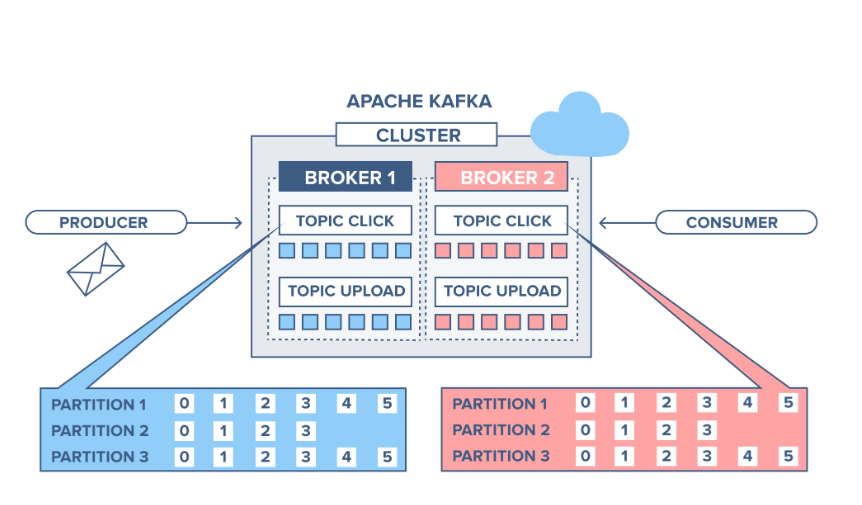

### Web Shop

Think of a webshop with a ‘similar products’ feature on the site. To make this work, each action performed by a consumer is recorded and sent to Kafka. A separate application comes along and consumes these messages, filtering out the products the consumer has shown an interest in and gathering information on similar products. This ‘similar product’ information is then sent back to the webshop for it to display to the consumer in real-time.

Alternatively, since all data is persistent in Kafka, a batch job can run overnight on the ‘similar product’ information gathered by the system, generating an email for the customer with suggestions of products.



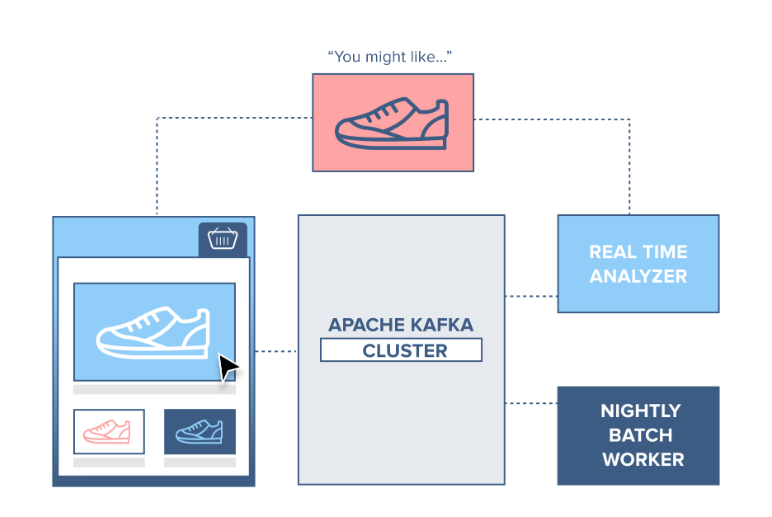